In [1]:
import json
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
from time import time
import io
import re

import pickle
from csv import reader
import matplotlib.pyplot as plt
%matplotlib inline

import regex as re
from newspaper import Article 
import requests

In [2]:
# import tensorflow as tf
# import numpy as np
# import pandas as pd 
# import regex as re
# from newspaper import Article 
# import requests

# import matplotlib.pyplot as plt
# %matplotlib inline


In [3]:
# df = pd.read_table("newsArticlesWithLabels.tsv")
# dataset from https://deepblue.lib.umich.edu/data/concern/data_sets/8w32r569d?locale=en

# df['article'] = df['url']

# def getArticle(url):
#     try:
#         article = Article(url)
#         article.download()
#         article.parse()
#         return(article.text)
#     except:
#         return("badurl")

# df['article'] = df.apply(lambda row: getArticle(row.url), axis = 1) 
# df.to_csv("articledata.csv", sep='\t')


In [4]:
data = pd.read_table("articledata.csv", sep='\t', index_col=0)
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
20999,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
21000,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
21001,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
21002,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [5]:
data = data[data.article != 'badurl']
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

<ipython-input-5-d4a13a7e4adb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


(16590, 8)

In [6]:
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
16585,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
16586,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
16587,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
16588,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [7]:
data.article[0:10]

0    Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1    WASHINGTON -- The Senate Judiciary Committee a...
2    David Cole is a professor of constitutional la...
3    Parts of ObamaCare are starting to fray, even ...
4    U.S. Immigration Citizenship and Immigration S...
5    Story highlights Rules let groups like religio...
6    Cispa has also secured the backing of several ...
7    New disclosures shared by Edward Snowden focus...
8    Cha của Snowden 'chuẩn bị thăm con'\n\nChụp lạ...
9    Tom Vanden Brook, @tvandenbrook\n\nUSA TODAY\n...
Name: article, dtype: object

In [8]:
data = data.drop(8)
data.reset_index(drop=True, inplace=True)
data.article[0:10]

0    Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1    WASHINGTON -- The Senate Judiciary Committee a...
2    David Cole is a professor of constitutional la...
3    Parts of ObamaCare are starting to fray, even ...
4    U.S. Immigration Citizenship and Immigration S...
5    Story highlights Rules let groups like religio...
6    Cispa has also secured the backing of several ...
7    New disclosures shared by Edward Snowden focus...
8    Tom Vanden Brook, @tvandenbrook\n\nUSA TODAY\n...
9    \n\n\n\n\n\n\n\n\n\n\n\nThe following irrespon...
Name: article, dtype: object

In [9]:
# rex = "tics cited by Mayors Against Illegal Guns.  Advertisement  For more than two decades, the state has kept centralized records on people who are ineligible under state law to possess firearms for mental health reasons. But because of privacy concerns, as well as differences in state and federal reporting standards, it took years for the state to begin sharing them.  California also goes beyond federal law in trying to keep guns out of the hands of the mentally ill. The state bans firearms possession for five years after someone is placed on a 72-hour psychiatric commitment.  Advertisement  One of the main obstacles in developing the federal mental health database for the background check system is confusion over who should be included. The law says the database should include people who have been judged \xe2\x80\x9cmentally defective.\xe2\x80\x9d  \xe2\x80\x9cNot only is that term highly offensive, it\xe2\x80\x99s completely outdated,\xe2\x80\x9d said Ron Honberg, policy director at the National Alliance on Mental Illness. \xe2\x80\x9cI think there\xe2\x80\x99s a lack of clarity, so states are all over the map on how to interpret it.\xe2\x80\x9d  Advertisement  In Alabama, for example, state officials decided to submit the names of people who had been involuntarily committed to institutions only when they\xe2\x80\x99d also been found guilty of an \xe2\x80\x9cinappropriate use of firearms\xe2\x80\x9d or shown to be a threat to do so. That turned out to be just 243 people, according to a report by Mayors Against Illegal Guns.  Some states have delayed over worries about privacy concerns. Others have antiquated database systems or say they don\xe2\x80\x99t ha"
# ex = r"{}".format(rex)
# print(rex)
# # ex.replace(r'\\x.{2}', ' ') 
# # ex.replace(r'\x[0-9A-F]{2}', ' ') 
# # re.sub(r'â', ' ', ex) 


# newex = re.sub(r'\\x.{2}', '', ex)
# print(newex)

# # newex = ex.replace(r'\\x.{2}', '')
# # newex

In [10]:
# for i in data.article[0:100]:
#     print(i)
#     print("")

In [11]:

    
# for i in range(len(data['article']):
#     temp = data['article'][i]
#     temp1 = re.sub(r'\\x[0-9A-F]{2}', '', temp)
#     temp =  r"{}".format(string)
#     temp 
# data['article'] = data['article'].str.lower() # transform strings to lowercase
data['article'] = data['article'].str.replace(r'\\x.{2},', ' ', regex=True)  # deal with "byte" values (\xe2\x80\x9d )
data['article'] = data['article'].str.replace(r'<[^>]*>', ' ', regex=True)  # deal with html tags values (<div>, <br>)
data['article'] = data['article'].str.replace(r'(?<=@)(.*)(?=\s)', '', regex=True) # remove twitter usernames
# data['article'] = data['article'].str.replace(r'(?!(([^"]*"){2})*[^"]*$),', '', regex=True)  # deal with '"10,000"' and convert them to '10000' 
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
16584,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
16585,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
16586,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
16587,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [12]:
badchars = ["\n", "/", "%.{2}", "â", "</s>", "@"]
# ,"\\"
# for i in badchars:
#     data['article'] = data.apply(lambda row: row.replace(i, " "), axis = 1) 

for i in badchars:
    data['article'] = data['article'].str.replace(i, " ")

data

<ipython-input-12-48abbb1a9241>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['article'] = data['article'].str.replace(i, " ")


,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
16584,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
16585,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
16586,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
16587,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [13]:
data['article'] = data['article'].str.lower() # transform strings to lowercase


In [14]:
sourcelist = ["usa today",
            "usatoday",
            "huffingtonpost",
            "huffington post",
            "fox news",
            "foxnews",
            "breitbart",
            "nbc",
            "nbcnews",
            "nbc news",
            "msnbcnews"
            "abc",
            "msnbc",
            "msnbc news",
            "abc news",
            "abcnews",
            "washingtonpost",
            "washington post",
            "latimes",
            "la times",
            "chicagotribune",
            "chicago tribune",
            "dailykos",
            "daily kos",
            "cnn",
            "(cnn)",
            "cnn news",
            "nytimes",
            "new york times",
            "newyorktimes",
            "newyorkpost",
            "new york post",
            "yahoo news",
            "yahoonews",
            "nbcpolitics",
            "nbc politics",
            "fox politics",
            "bbc news",
            "bbc",
            "firstread",
            "stateline",
            "reuters",
            "story highlights"
             ]
for i in sourcelist:
    data['article'] = data['article'].str.replace(i, " SOURCE ")


<ipython-input-14-65a091c81cd8>:46: FutureWarning: The default value of regex will change from True to False in a future version.
  data['article'] = data['article'].str.replace(i, " SOURCE ")


In [15]:
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,maggie clark pew SOURCE staff writer 21 st...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,washington -- the senate judiciary committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,david cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"parts of obamacare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,u.s. immigration citizenship and immigration s...
...,...,...,...,...,...,...,...,...
16584,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,president obama won reelection in part by beat...
16585,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"red-faced republicans, circling and preparing ..."
16586,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,rep. steve stockman’s moment as a viable senat...
16587,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,we interrupt this highly partisan and ideologi...


In [16]:

# sourcelist = []

# for i in range(data.shape[0]):
#     urlstring = data.url[i]
#     source = re.findall("(?<=www.)(.*)(?=.com)", urlstring)
#     if len(source) > 0:
#         sourcelist.append(source)

# print(sourcelist)

In [17]:
# for i in data['article'][400:550]:
#     print(i)
#     print("")

In [18]:
data['length'] = data['article'].str.split()
data['length'] = data['length'].str.len()
data = data.reset_index(drop=True)
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,maggie clark pew SOURCE staff writer 21 st...,702
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,washington -- the senate judiciary committee a...,1118
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,david cole is a professor of constitutional la...,1401
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"parts of obamacare are starting to fray, even ...",798
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,u.s. immigration citizenship and immigration s...,949


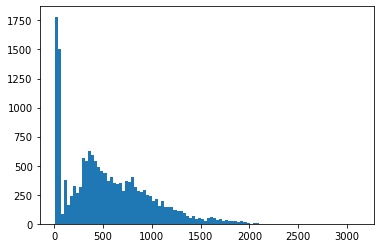

In [19]:
plt.hist(data.length, bins = 100)
plt.show()

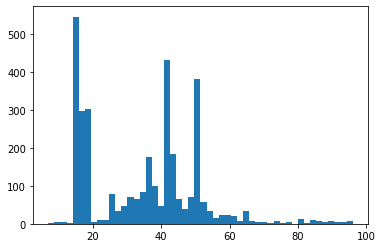

In [20]:
plt.hist(data[data['length']<100].length, bins = 50)
plt.show()

In [21]:
len(data['length'])

16589

In [22]:
len(data[data['length']<100])

3370

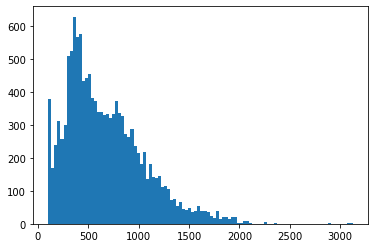

In [23]:
plt.hist(data[data['length']>100].length, bins = 100)
plt.show()

In [24]:
def truncate(text, length):
    newtext =text
    if len(text.split())>=length:
        words = text.split()[:length]
        newtext = " ".join(words)
    return newtext

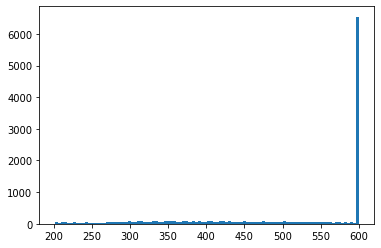

In [25]:
data = data[data['length']>200]
data["article"] = data.apply(lambda row: truncate(row["article"], 600), axis=1)
data['length'] = data['article'].str.split()
data['length'] = data['length'].str.len()
data = data.reset_index(drop=True)

plt.hist(data[data['length']>100].length, bins = 100)
plt.show()

In [26]:
data.length.quantile([.25, .5, .75])

0.25    408.0
0.50    600.0
0.75    600.0
Name: length, dtype: float64

<AxesSubplot:>

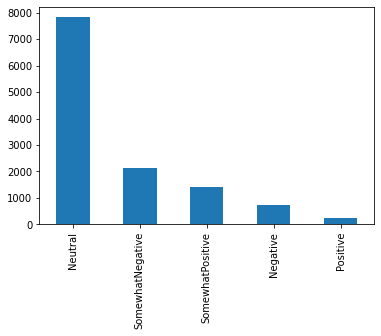

In [27]:
data['democrat.vote'].value_counts().plot.bar()

<AxesSubplot:>

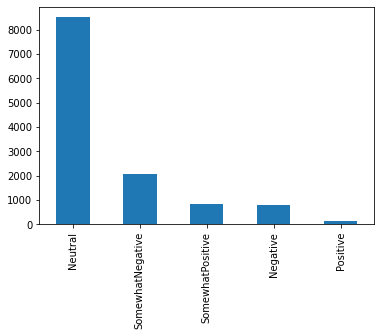

In [28]:
data['republican.vote'].value_counts().plot.bar()

<AxesSubplot:xlabel='democrat.vote,republican.vote'>

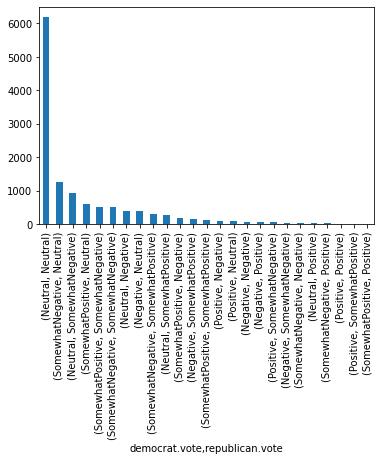

In [29]:
data[['democrat.vote', 'republican.vote']].value_counts().plot.bar()

In [30]:
def numerizeBias(label):
    if label=="SomewhatNegative":
        return -0.5
    if label == "SomewhatPositive":
        return 0.5
    if label == "Negative":
        return -1
    if label == "Positive":
        return 1
    return 0

In [31]:
data["democrat.bias"]= data.apply(lambda row: numerizeBias(row["democrat.vote"]), axis = 1) 
data["republican.bias"]= data.apply(lambda row: numerizeBias(row["republican.vote"]), axis = 1) 

<AxesSubplot:xlabel='democrat.bias,republican.bias'>

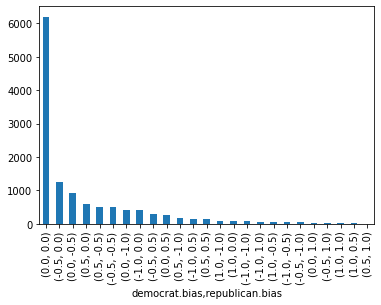

In [32]:
data[['democrat.bias', 'republican.bias']].value_counts().plot.bar()

In [33]:
def labelBias(dlabel, rlabel):
    if dlabel == rlabel:
        return "Neutral"
    if dlabel-rlabel==0.5:
        return "Somewhat Liberal"
    if dlabel-rlabel==1:
        return "Liberal"
    if dlabel-rlabel>1:
        return "Very Liberal"
    if rlabel-dlabel==0.5:
        return "Somewhat Conservative"
    if rlabel-dlabel==1:
        return "Conservative"
    if rlabel-dlabel>1:
        return "Very Conservative"
    return "Other"
    
#     if dlabel==rlabel:
#         return "Neutral"
#     if dlabel=="Negative":
#         return "Conservative"
#     if dlabel=="Positive":
#         return "Liberal"
#     if dlabel=="SomewhatNegative" and rlabel=="SomewhatPositive":
#         return "SomewhatConservative"
#     if dlabel=="SomewhatPositive" and rlabel=="SomewhatNegative":
#         return "SomewhatLiberal"
#     if rlabel=="SomewhatPositive":
#         return "SomewhatConservative"
#     if dlabel=="SomewhatPositive":
#         return "SomewhatLiberal"
# #     if dlabel=="Negative" and rlabel=="Positive":
# #         return "Conservative"
# #     if dlabel=="Positive" and rlabel=="Negative":
# #         return "Liberal"

#     return(dlabel+" "+rlabel)

In [34]:
data["biaslabel"] = data.apply(lambda row: labelBias(row["democrat.bias"],row["republican.bias"]), axis = 1)
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length,democrat.bias,republican.bias,biaslabel
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,maggie clark pew SOURCE staff writer 21 states...,600,0.0,0.0,Neutral
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,washington -- the senate judiciary committee a...,600,0.0,0.0,Neutral
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,david cole is a professor of constitutional la...,600,0.0,0.0,Neutral
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"parts of obamacare are starting to fray, even ...",600,0.0,0.0,Neutral
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,u.s. immigration citizenship and immigration s...,600,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
12345,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,president obama won reelection in part by beat...,600,0.5,-0.5,Liberal
12346,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"red-faced republicans, circling and preparing ...",600,0.5,-0.5,Liberal
12347,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,rep. steve stockman’s moment as a viable senat...,600,0.0,0.0,Neutral
12348,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,we interrupt this highly partisan and ideologi...,600,0.5,-0.5,Liberal


<AxesSubplot:>

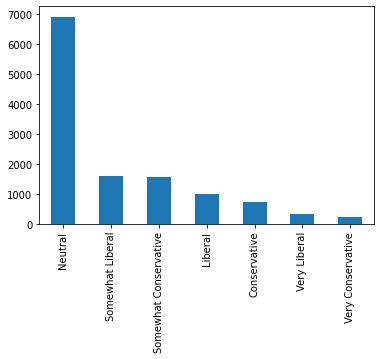

In [35]:
data['biaslabel'].value_counts().plot.bar()

<AxesSubplot:>

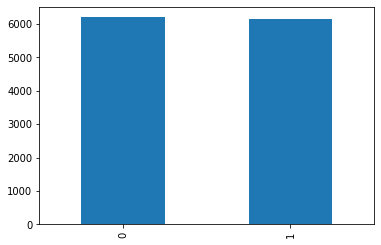

In [36]:
data["democrat.bias"]= data.apply(lambda row: numerizeBias(row["democrat.vote"]), axis = 1) 
data["republican.bias"]= data.apply(lambda row: numerizeBias(row["republican.vote"]), axis = 1) 

# data["biasmagnitude.democrat"]=data.apply(lambda row: row["democrat.bias"] + abs(row["republican.bias"]), axis = 1)
# data["biasmagnitude.republican"]=data.apply(lambda row: -1*abs(row["democrat.bias"]) + row["republican.bias"], axis = 1)

# data["biasmagnitude"] = data.apply(lambda row: row["democrat.bias"]-row["republican.bias"], axis = 1)
data["isbiased"] = data.apply(lambda row: 0 if row["democrat.bias"]==0 and row["republican.bias"]==0 else 1, axis = 1)

# data["biasmagnitude"].value_counts().plot.bar()
data["isbiased"].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

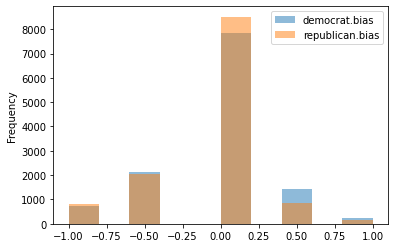

In [37]:
data[["democrat.bias", "republican.bias"]].plot.hist(alpha=0.5)

In [38]:
data["biascategories"] =  data.apply(lambda row: 0 if row["democrat.bias"]==row["republican.bias"] else (1 if row["democrat.bias"]>row["republican.bias"] else -1), axis = 1)
# 1 means bias towards democrats over republicans
# -1 means bias towards republicans over democrats
# 0 equal bias

<AxesSubplot:ylabel='Frequency'>

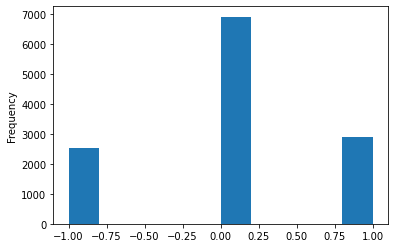

In [39]:
data["biascategories"].plot.hist()

In [40]:
data.article[0:100]

0     maggie clark pew SOURCE staff writer 21 states...
1     washington -- the senate judiciary committee a...
2     david cole is a professor of constitutional la...
3     parts of obamacare are starting to fray, even ...
4     u.s. immigration citizenship and immigration s...
                            ...                        
95    during the 11 years she spent as labor ministe...
96    the day after eric garcetti won a spot in the ...
97    in a new critique of how minorities are treate...
98    sarah helene duggin from the catholic universi...
99    new york -- new york city mayor-elect bill de ...
Name: article, Length: 100, dtype: object

In [41]:
saved_data = data
# saved_data = data[["article", 
#                    "democrat.bias", 
#                    "republican.bias", 
#                    "isbiased", 
#                    "biaslabel"]]
print(saved_data.shape)

(12350, 14)


In [42]:
saved_data.isna().sum()

url                0
q3                 0
perceived          0
primary.topic      0
secondary.topic    0
democrat.vote      0
republican.vote    0
article            0
length             0
democrat.bias      0
republican.bias    0
biaslabel          0
isbiased           0
biascategories     0
dtype: int64

In [43]:
# data["biasedforeveryone"] =  data.apply(lambda row: -99 if row["democrat.bias"]>=0 and row["republican.bias"]>=0 else 0, axis = 1)
# # high value of biasdiff means high bias towards democrats and against republicans
# # low (negative) value of biasdiff means high bias towards republicans and democrats
# data["biasedforeveryone"].plot.hist()

In [44]:
saved_data = saved_data.reset_index(drop=True)

In [45]:
data.article[1834]

"at age 9, martin luther king jr. sang in his church choir at the dec. 15, 1939, atlanta premiere of the civil war-era romance. one of the film's stars, hattie mcdaniel, refused to attend because loew's grand theatre had separate sections for black and white filmgoers. 1. he sang at the debut of 'gone with the wind' at age 9, martin luther king jr. sang in his church choir at the dec. 15, 1939, atlanta premiere of the civil war-era romance. one of the film's stars, hattie mcdaniel, refused to attend because loew's grand theatre had separate sections for black and white filmgoers. turner entertainment the rev. martin luther king jr., the slain civil rights leader and nobel peace prize winner, is lionized each year at ceremonies on the federal holiday in his honor. here’s what you may not know about him. the rev. martin luther king jr., the slain civil rights leader and nobel peace prize winner, is lionized each year at ceremonies on the federal holiday in his honor. here’s what you may 

In [46]:
pd.set_option('display.max_rows', 500)
saved_data.article.head(100)

0     maggie clark pew SOURCE staff writer 21 states...
1     washington -- the senate judiciary committee a...
2     david cole is a professor of constitutional la...
3     parts of obamacare are starting to fray, even ...
4     u.s. immigration citizenship and immigration s...
5     SOURCE rules let groups like religious hospita...
6     new disclosures shared by edward snowden focus...
7     tom vanden brook,     SOURCE   justice's delay...
8                 the following irresponsible police...
9     an alternative possibility is that a bipartisa...
10    cole is the grammy-winning singer and daughter...
11    sacramento — “living in parallel universes,” i...
12    co-host of ms SOURCE 's "the cycle" touré join...
13    washington -- one week after he released parti...
14    us representative michele bachmann speaks duri...
15    the agency missed a feb. 15 deadline to comple...
16    labor secretary nominee thomas perez cut a "se...
17    washington, dc - july 31: speaker of the h

In [47]:
saved_data.to_csv("biaseddata.csv", sep='\t')
